In [2]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers , regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Bidirectional
import matplotlib.dates as mdates
from tensorflow.keras.callbacks import EarlyStopping
import datetime as dt

In [8]:
df = pd.read_csv("STOCK_INDEX.csv")

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2667.000000,2667.000000,2667.000000,2667.000000,2667.000000,2.667000e+03
mean,8269.195149,8312.379344,8211.006332,8261.834986,8261.834986,2.178558e+05
std,2585.209169,2592.927841,2568.153153,2581.268450,2581.268450,2.291874e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5815.699951,5855.649902,5764.375000,5817.650147,5817.650147,0.000000e+00
50%,8132.950195,8180.200195,8089.399902,8129.350098,8129.350098,1.662000e+05
75%,10481.300295,10534.850100,10415.774905,10471.750000,10471.750000,2.771000e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2694 non-null   object 
 1   Open       2667 non-null   float64
 2   High       2667 non-null   float64
 3   Low        2667 non-null   float64
 4   Close      2667 non-null   float64
 5   Adj Close  2667 non-null   float64
 6   Volume     2667 non-null   float64
dtypes: float64(6), object(1)
memory usage: 147.5+ KB


In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
columns = df.columns
columns = columns[1:]
columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
for column in columns:
    y = pd.Series(df[column])
    df[column] = y.interpolate(limit_direction='both', kind='cubic')

In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2.694000e+03
mean,8256.558319,8299.668592,8198.441115,8249.203418,8249.203418,2.169812e+05
std,2585.472069,2593.199591,2568.461038,2581.618283,2581.618283,2.290617e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,5803.624878,5845.687622,5750.112671,5797.612426,5797.612426,0.000000e+00
50%,8125.175049,8169.250000,8082.550049,8125.675049,8125.675049,1.655000e+05
75%,10475.212890,10524.100098,10409.112793,10459.737305,10459.737305,2.750500e+05
max,15371.450200,15431.750000,15243.400390,15314.700200,15314.700200,1.811000e+06


In [19]:
minimum = df['Close'].min()
maximum = df['Close'].max()
difference = maximum - minimum
print(minimum)
print(difference)

df['Close'] = (df['Close'] - minimum)/difference

4544.200195
10770.500004999998


In [11]:
df1=df[['Date','Close']]
df1

,Date,Close
0,2010-01-04,0.063878
1,2010-01-05,0.068121
2,2010-01-06,0.068483
3,2010-01-07,0.066747
4,2010-01-08,0.065043
...,...,...
2689,2021-04-26,0.922965
2690,2021-04-27,0.938568
2691,2021-04-28,0.958205
2692,2021-04-29,0.961023


In [12]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return dt.datetime(year=year, month=month, day=day)


In [13]:
df1['Date'] = df1['Date'].apply(str_to_datetime)

C:\Users\Shikh\AppData\Local\Temp\ipykernel_3912\2509066908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = df1['Date'].apply(str_to_datetime)


In [14]:
df1['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2689   2021-04-26
2690   2021-04-27
2691   2021-04-28
2692   2021-04-29
2693   2021-04-30
Name: Date, Length: 2694, dtype: datetime64[ns]

In [15]:
df1.index = df1.pop('Date')

In [16]:
df1

,Close
Date,
2010-01-04,0.063878
2010-01-05,0.068121
2010-01-06,0.068483
2010-01-07,0.066747
2010-01-08,0.065043
...,...
2021-04-26,0.922965
2021-04-27,0.938568
2021-04-28,0.958205


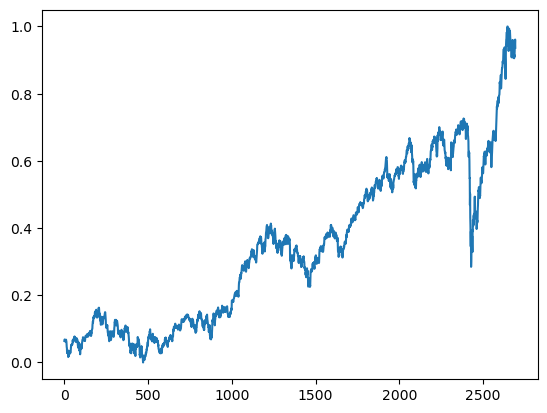

In [17]:
plt.plot(df.index, df['Close'])

In [18]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+dt.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = dt.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

In [19]:
df_w = df_to_windowed_df(df1, '2010-03-19', '2021-04-30', n=50)
df_w

,Target Date,Target-50,Target-49,Target-48,Target-47,Target-46,Target-45,Target-44,Target-43,Target-42,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2010-03-19,0.063878,0.068121,0.068483,0.066747,0.065043,0.065475,0.061854,0.064041,0.066450,...,0.049770,0.050555,0.053832,0.051743,0.053113,0.054705,0.055039,0.054287,0.060712,0.066719
1,2010-03-22,0.068121,0.068483,0.066747,0.065043,0.065475,0.061854,0.064041,0.066450,0.065735,...,0.050555,0.053832,0.051743,0.053113,0.054705,0.055039,0.054287,0.060712,0.066719,0.061371
2,2010-03-23,0.068483,0.066747,0.065043,0.065475,0.061854,0.064041,0.066450,0.065735,0.067838,...,0.053832,0.051743,0.053113,0.054705,0.055039,0.054287,0.060712,0.066719,0.061371,0.063238
3,2010-03-25,0.066747,0.065043,0.065475,0.061854,0.064041,0.066450,0.065735,0.067838,0.063270,...,0.051743,0.053113,0.054705,0.055039,0.054287,0.060712,0.066719,0.061371,0.063238,0.066496
4,2010-03-26,0.065043,0.065475,0.061854,0.064041,0.066450,0.065735,0.067838,0.063270,0.062903,...,0.053113,0.054705,0.055039,0.054287,0.060712,0.066719,0.061371,0.063238,0.066496,0.068502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,2021-04-26,0.961093,0.963748,0.981533,0.980929,0.980669,0.986872,0.985943,1.000000,0.999884,...,0.955448,0.906792,0.924804,0.931921,0.935300,0.911309,0.905455,0.915645,0.909628,0.922965
2640,2021-04-27,0.963748,0.981533,0.980929,0.980669,0.986872,0.985943,1.000000,0.999884,0.990177,...,0.906792,0.924804,0.931921,0.935300,0.911309,0.905455,0.915645,0.909628,0.922965,0.938568
2641,2021-04-28,0.981533,0.980929,0.980669,0.986872,0.985943,1.000000,0.999884,0.990177,0.981825,...,0.924804,0.931921,0.935300,0.911309,0.905455,0.915645,0.909628,0.922965,0.938568,0.958205
2642,2021-04-29,0.980929,0.980669,0.986872,0.985943,1.000000,0.999884,0.990177,0.981825,0.943652,...,0.931921,0.935300,0.911309,0.905455,0.915645,0.909628,0.922965,0.938568,0.958205,0.961023


In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

In [21]:
dates, X, y = windowed_df_to_date_X_y(df_w)

# print(X)

dates.shape, X.shape, y.shape

((2644,), (2644, 50, 1), (2644,))

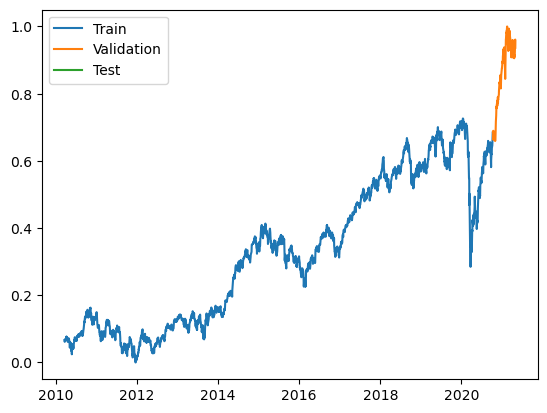

In [22]:
q_80 = int(len(dates) * 0.95)
q_90 = int(len(dates) * 1.0)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [23]:
tf.random.set_seed(64)
np.random.seed(64)

In [24]:
model = Sequential([layers.Input((50, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(2)])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)
model.add(layers.Dense(units=2, activation='relu', kernel_regularizer=regularizers.l2(l2=0.1)))

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100,  batch_size=20, validation_split=0.1, verbose=1)

# model.add(Bidirectional(LSTM(32)))

Epoch 1/100
126/126 [==============================] - 5s 21ms/step - loss: 0.1492 - mean_absolute_error: 0.3056 - val_loss: 0.5466 - val_mean_absolute_error: 0.7167
Epoch 2/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.1092 - val_loss: 0.0149 - val_mean_absolute_error: 0.1070
Epoch 3/100
126/126 [==============================] - 2s 17ms/step - loss: 6.9525e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0142 - val_mean_absolute_error: 0.1036
Epoch 4/100
126/126 [==============================] - 2s 18ms/step - loss: 5.9793e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0117 - val_mean_absolute_error: 0.0944
Epoch 5/100
126/126 [==============================] - 2s 18ms/step - loss: 3.4368e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0072 - val_mean_absolute_error: 0.0717
Epoch 6/100
126/126 [==============================] - 3s 21ms/step - loss: 7.1538e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0046 - val_mean_absolute_er

126/126 [==============================] - 2s 18ms/step - loss: 2.0640e-04 - mean_absolute_error: 0.0088 - val_loss: 0.0120 - val_mean_absolute_error: 0.0982
Epoch 50/100
126/126 [==============================] - 2s 19ms/step - loss: 2.1940e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0151 - val_mean_absolute_error: 0.1127
Epoch 51/100
126/126 [==============================] - 2s 17ms/step - loss: 3.1917e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0152 - val_mean_absolute_error: 0.1139
Epoch 52/100
126/126 [==============================] - 2s 18ms/step - loss: 4.9100e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0086 - val_mean_absolute_error: 0.0817
Epoch 53/100
126/126 [==============================] - 2s 18ms/step - loss: 2.5689e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0046 - val_mean_absolute_error: 0.0585
Epoch 54/100
126/126 [==============================] - 2s 18ms/step - loss: 3.3404e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0058 - val_mean_absolute_e

Epoch 97/100
126/126 [==============================] - 2s 18ms/step - loss: 2.7262e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0132 - val_mean_absolute_error: 0.1059
Epoch 98/100
126/126 [==============================] - 2s 18ms/step - loss: 2.3372e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0043 - val_mean_absolute_error: 0.0544
Epoch 99/100
126/126 [==============================] - 2s 19ms/step - loss: 2.5675e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0129 - val_mean_absolute_error: 0.1049
Epoch 100/100
126/126 [==============================] - 2s 18ms/step - loss: 2.1283e-04 - mean_absolute_error: 0.0091 - val_loss: 0.0084 - val_mean_absolute_error: 0.0811


In [25]:
df2 = pd.read_csv('sample_input2.csv')
     
actual_close = np.loadtxt('sample_close2.txt')

actual_close = actual_close

for column in columns:
    z = pd.Series(df2[column])
    df2[column] = z.interpolate(limit_direction='both', kind='cubic')
    
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,10896.424084,10934.496017,10850.507033,10894.610002,10894.610002,226176.000000
std,222.466066,219.440276,228.920398,228.128005,228.128005,82220.009879
min,10579.000000,10633.150390,10550.900390,10589.099610,10589.099610,0.000000
25%,10736.912842,10780.037603,10686.425050,10737.387695,10737.387695,202500.000000
50%,10819.525390,10835.500000,10775.299810,10812.875005,10812.875005,219150.000000
75%,11019.624757,11074.987552,10988.812745,11016.725342,11016.725342,236475.000000
max,11401.500000,11427.650390,11370.599610,11387.099610,11387.099610,610300.000000


In [26]:
df2 = df2[['Date' , 'Close']]
df2

,Date,Close
0,29-05-2018,10633.29981
1,30-05-2018,10614.34961
2,31-05-2018,10736.15039
3,01-06-2018,10696.20020
4,04-06-2018,10628.50000
5,05-06-2018,10593.15039
6,06-06-2018,10684.65039
7,07-06-2018,10768.34961
8,08-06-2018,10767.65039
9,11-06-2018,10786.95020


In [27]:
X1 = np.array(df2['Close'])
X1 = X1.reshape((1,50))
X1 = (X1-minimum)/difference
print(X1.shape)
print(X1)

(1, 50)
[[0.56534976 0.56359031 0.57489905 0.57118982 0.56490412 0.56162204
  0.57011747 0.57788862 0.5778237  0.57961562 0.58480566 0.58609164
  0.58157464 0.58247064 0.58081328 0.57251288 0.57823217 0.57535856
  0.58285589 0.57734089 0.57796297 0.56888726 0.56124594 0.5728703
  0.56757807 0.57153337 0.57803261 0.57616172 0.57828793 0.58573884
  0.59449884 0.59459632 0.60155053 0.60115131 0.59353321 0.60014388
  0.59758136 0.59541334 0.60034353 0.6072652  0.61186571 0.61165218
  0.61492963 0.62524018 0.62906547 0.63249615 0.63153985 0.62211597
  0.63289537 0.63533721]]


In [28]:
X1 = X1.reshape((1, 50, 1))
X1 = X1.astype(np.float32)
X1 = np.array(X1)

pred_close = model.predict(X1).flatten()
print(pred_close.shape)
pred_close = (pred_close*difference) + minimum
print(pred_close)
print(actual_close)

1/1 [==============================] - 0s 328ms/step
(2,)
[11369.551 11369.551]
[11470.7002 11429.5   ]


In [29]:
    # Calculation of squared_error
actual_close = np.array(actual_close)
pred_close = np.array(pred_close)
mean_square_error = np.mean(np.square(actual_close-pred_close))


pred_prev = [df2['Close'].iloc[-1]]

pred_prev.append(pred_close[0])

pred_curr = pred_close

actual_prev = [df2['Close'].iloc[-1]]    
actual_prev.append(actual_close[0])
actual_curr = actual_close

    # Calculation of directional_accuracy
pred_dir = np.array(pred_curr)-np.array(pred_prev)
actual_dir = np.array(actual_curr)-np.array(actual_prev)
dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')

Mean Square Error: 6912.556871
Directional Accuracy: 0.0
